In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd

In [7]:
def get_data(ticker='^GSPC', start_='2010-01-01', end_='2022-12-31', interval_='1d',fill_weekends=False):
    # download data
    df = yf.download(ticker, start_, end_, interval=interval_)
    # rename columns
    df.rename(columns={"Open": "open", "Adj Close": "close", "High": "high", "Low": "low", "Volume": "volume"}, inplace=True)
    # drop close column
    df.drop("Close", inplace=True, axis=1)
    # fill weekends
    if fill_weekends:
        df = df.resample('D').ffill()
    return df

In [8]:
win_size = 60

In [2]:
df = pd.read_json('test_env_data.json')

In [3]:
# if cash in step i-1 is higher than cash in step i, then it is a buy
df['buy'] = df['cash'].shift(1) > df['cash']
# if cash in step i-1 is lower than cash in step i, then it is a sell
df['sell'] = df['cash'].shift(1) < df['cash']

In [4]:
df

,sp500,cash,buy,sell
0,0.000000,1.000000,False,False
1,0.000000,1.000000,False,False
2,1.010983,0.000000,True,False
3,1.007745,0.000000,False,False
4,1.014341,0.000000,False,False
...,...,...,...,...
872,0.000000,0.821536,False,False
873,0.000000,0.821536,False,False
874,0.450112,0.365948,True,False
875,0.322067,0.499520,False,True


In [14]:
df_orig = get_data(start_='2019-05-29', end_='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [17]:
df_orig.reset_index(inplace=True)
df_orig = df_orig.iloc[win_size:len(df)+win_size]

In [18]:
df_orig

,Date,open,high,low,close,volume,ADL,ADX,AO,ATR,...,WILLIAMS,WMA,WOBV,ZLEMA,sin_weekday,cos_weekday,sin_monthday,cos_monthday,sin_yearday,cos_yearday
60,2005-03-28,0.094183,0.092968,0.096822,0.095443,0.046029,0.002022,0.076882,0.400716,0.025977,...,0.097913,0.092947,0.430410,0.094413,0.000000,1.000000,-5.712682e-01,0.820763,0.997325,0.073095
61,2005-03-29,0.094730,0.092868,0.095339,0.093733,0.067529,0.001432,0.082117,0.397309,0.030184,...,0.029961,0.092297,0.428341,0.093547,0.781831,0.623490,-3.943559e-01,0.918958,0.998435,0.055917
62,2005-03-30,0.093023,0.093280,0.095660,0.096811,0.061844,0.002127,0.085157,0.396126,0.031856,...,0.359069,0.092407,0.431852,0.093352,0.974928,-0.222521,-2.012985e-01,0.979530,0.999250,0.038722
63,2005-03-31,0.096094,0.093854,0.098371,0.096653,0.067123,0.001707,0.085428,0.401008,0.029512,...,0.342452,0.092515,0.431663,0.093049,0.433884,-0.900969,-2.449294e-16,1.000000,0.999769,0.021516
64,2005-04-01,0.095938,0.094865,0.096533,0.095183,0.065070,0.001198,0.089801,0.403623,0.031963,...,0.197014,0.092367,0.429928,0.092679,-0.433884,-0.900969,2.012985e-01,0.979530,0.999991,0.004304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,2008-05-07,0.141274,0.138936,0.138984,0.137300,0.151027,0.059654,0.069567,0.528438,0.085319,...,0.438756,0.136642,0.441889,0.138173,0.974928,-0.222521,9.884683e-01,0.151428,0.806480,-0.591261
873,2008-05-08,0.136834,0.135638,0.138644,0.138280,0.139836,0.060014,0.067435,0.523118,0.076797,...,0.526477,0.136499,0.443930,0.138332,0.433884,-0.900969,9.987165e-01,-0.050649,0.796183,-0.605056
874,2008-05-09,0.136951,0.134209,0.137631,0.136478,0.125912,0.059745,0.063015,0.510111,0.078018,...,0.348715,0.135994,0.440480,0.138154,-0.433884,-0.900969,9.680771e-01,-0.250653,0.785650,-0.618671
875,2008-05-12,0.135898,0.135966,0.138032,0.139412,0.119242,0.060819,0.062156,0.501258,0.077788,...,0.629285,0.136115,0.445859,0.138299,0.000000,1.000000,6.513725e-01,-0.758758,0.752667,-0.658402


ValueError: x and y must be the same size

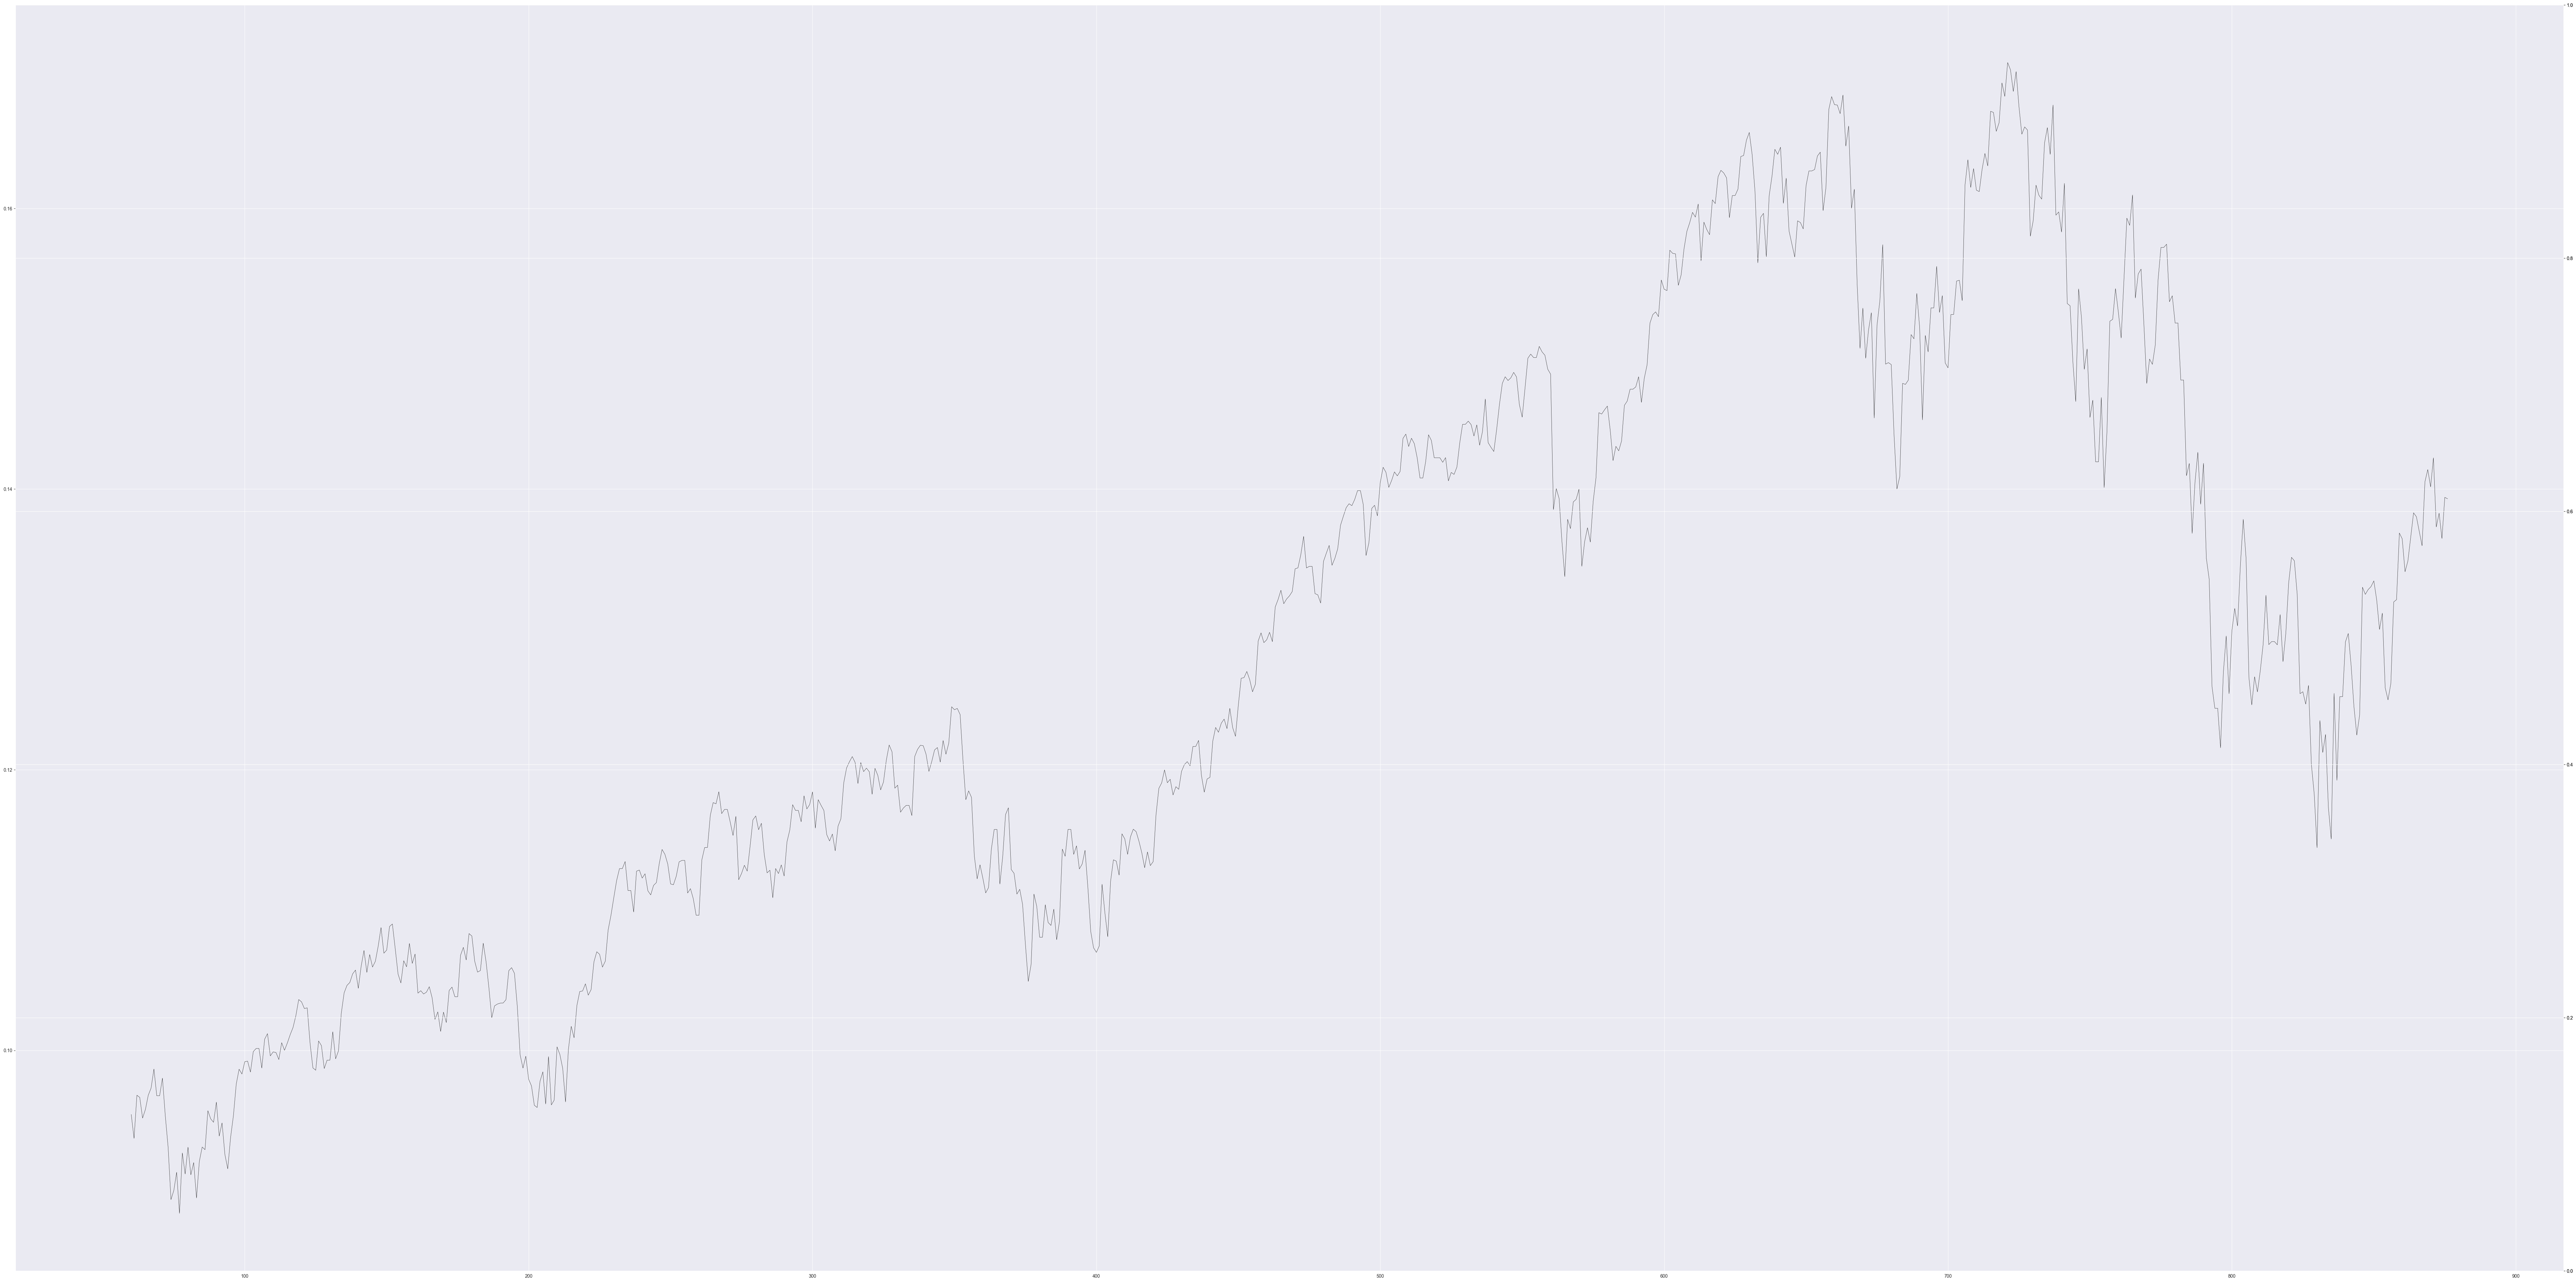

In [19]:
# plot close price and buy/sell signals
fig, ax1 = plt.subplots(figsize=(100, 50))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax1.plot(df_orig['close'], label='close', linewidth=0.5, color='black')

ax1.scatter(df[df['buy']].index, df_orig['close'][df['buy']], marker='^', color='green', label='buy', s=1)
ax1.scatter(df[df['sell']].index, df_orig['close'][df['sell']], marker='v', color='red', label='sell', s=1)

ax2.plot(df['cash'] + df['sp500'], label='portfolio value', linewidth=1, color='red')

ax3.bar(df.index, height=df['cash'], label='cash', linewidth=0.5, color='blue', bottom=0, alpha=0.1)
ax3.bar(df.index, height=df['sp500'], label='sp500', linewidth=0.5, color='orange', bottom=df['cash'], alpha=0.1)

ax3.set_ylim(ax2.get_ylim())


ax1.grid(False)
ax2.grid()
ax3.grid(False)
fig.legend()
plt.show()
